In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Federal Support.csv')

# Display the dimension of the dataset
print("Dimension of dataset:", df.shape)
# df.info()
df.head(2)

Dimension of dataset: (73, 16)


,Category,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Province,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Canada Health Transfer,34026,36068,37150,38584,40373,41870,43126,45208,49421,52081,Federal,NaN,NaN,NaN,NaN
1,Canada Social Transfer,12959,13348,13748,14161,14586,15023,15474,15938,16416,16909,Federal,NaN,NaN,NaN,NaN


In [13]:

# Create an empty list to collect the rows
rows = []

# Loop through each row in df2
for k in range(72):
    for i in range(1, 11):
        # Append a dictionary representing the new row to the list
        rows.append({
            'Category': df.iloc[k, 0],   # The category column
            'Year': df.columns[i],       # The year column name (as year)
            'Value': df.iloc[k, i],      # The value in the year column
            'Province': df.iloc[k, 11]   # The province column
        })

# Convert the list of rows to a DataFrame
df3 = pd.DataFrame(rows)

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  720 non-null    object
 1   Year      720 non-null    object
 2   Value     720 non-null    object
 3   Province  720 non-null    object
dtypes: object(4)
memory usage: 22.6+ KB


In [15]:
df3['Category'].unique()

array(['Canada Health Transfer', 'Canada Social Transfer', 'Equalization',
       'Offshore Offsets', 'Territorial Formula Financing',
       'Total - Federal Support', 'Per Capita Allocation (dollars)'],
      dtype=object)

In [16]:
df3['Year'].unique()

array(['2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21',
       '2021-22', '2022-23', '2023-24', '2024-25'], dtype=object)

In [17]:
df3['Province'].unique()

array(['Federal', 'Newfoundland and Labrador', 'Prince Edward',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut'], dtype=object)

In [18]:

# Remove rows where 'Province' is 'Federal'
df3 = df3.query("Province != 'Federal'")

# Ensure the 'Value' column is numeric
df3['Value'] = pd.to_numeric(df3['Value'], errors='coerce')

df3 = df3.fillna(0)

#df3.to_csv('Cleaned_Federal_Support.csv', index=False, sep=',', encoding='utf-8')


<function matplotlib.pyplot.show(close=None, block=None)>

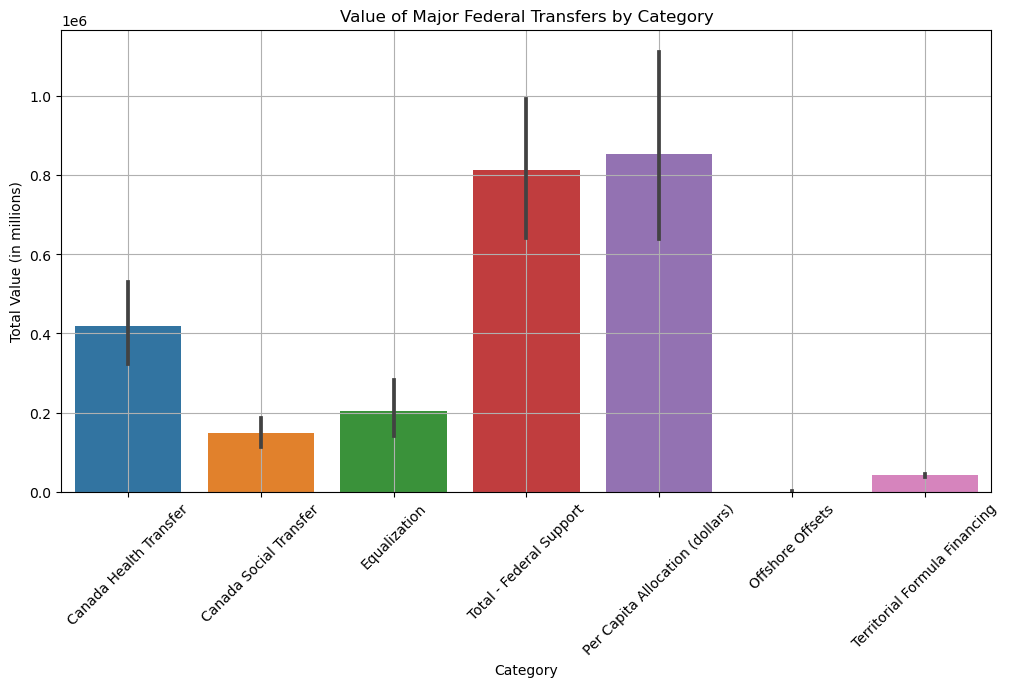

In [19]:

# Plot the total value for each category
plt.figure(figsize=(12, 6))
sns.barplot(data=df3, x='Category', y='Value', estimator=sum)
plt.xlabel('Category')
plt.ylabel('Total Value (in millions)')
plt.title('Value of Major Federal Transfers by Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Value of Major Federal Transfers by Category.png', bbox_inches='tight')  
plt.show

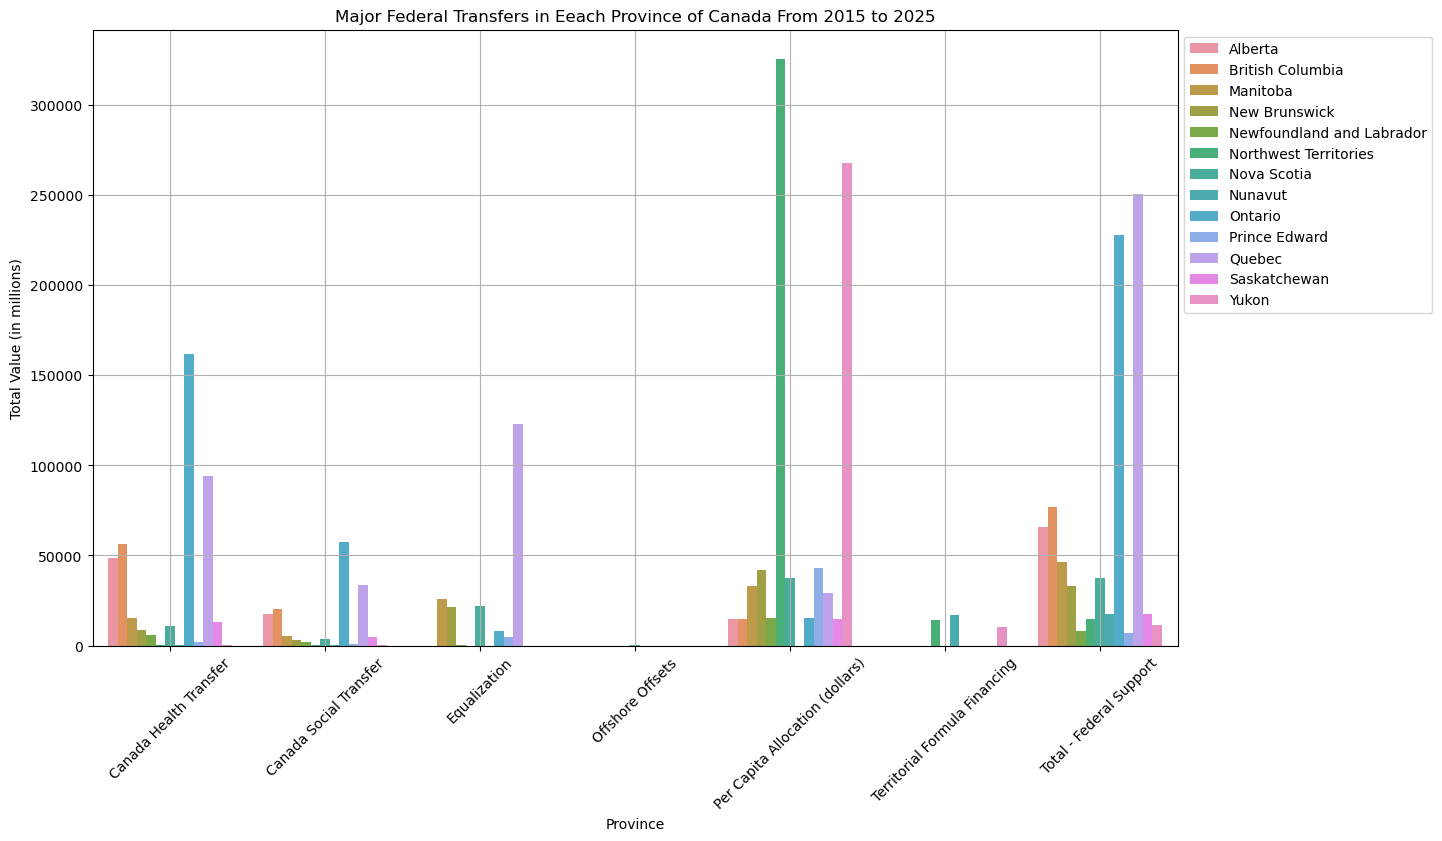

In [20]:

# Group by Province and Category
category_province_df = df3.groupby(['Category', 'Province']).sum().reset_index()

# Plot total value for each province
plt.figure(figsize=(14, 8))
sns.barplot(data=category_province_df, x='Category', y='Value', hue='Province', estimator=sum)
plt.xlabel('Province')
plt.ylabel('Total Value (in millions)')
plt.title('Major Federal Transfers in Eeach Province of Canada From 2015 to 2025')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('Major Federal Transfers in Eeach Province of Canada From 2015 to 2025.png', bbox_inches='tight')  
plt.show()


G:\Leilafiles\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Leilafiles\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


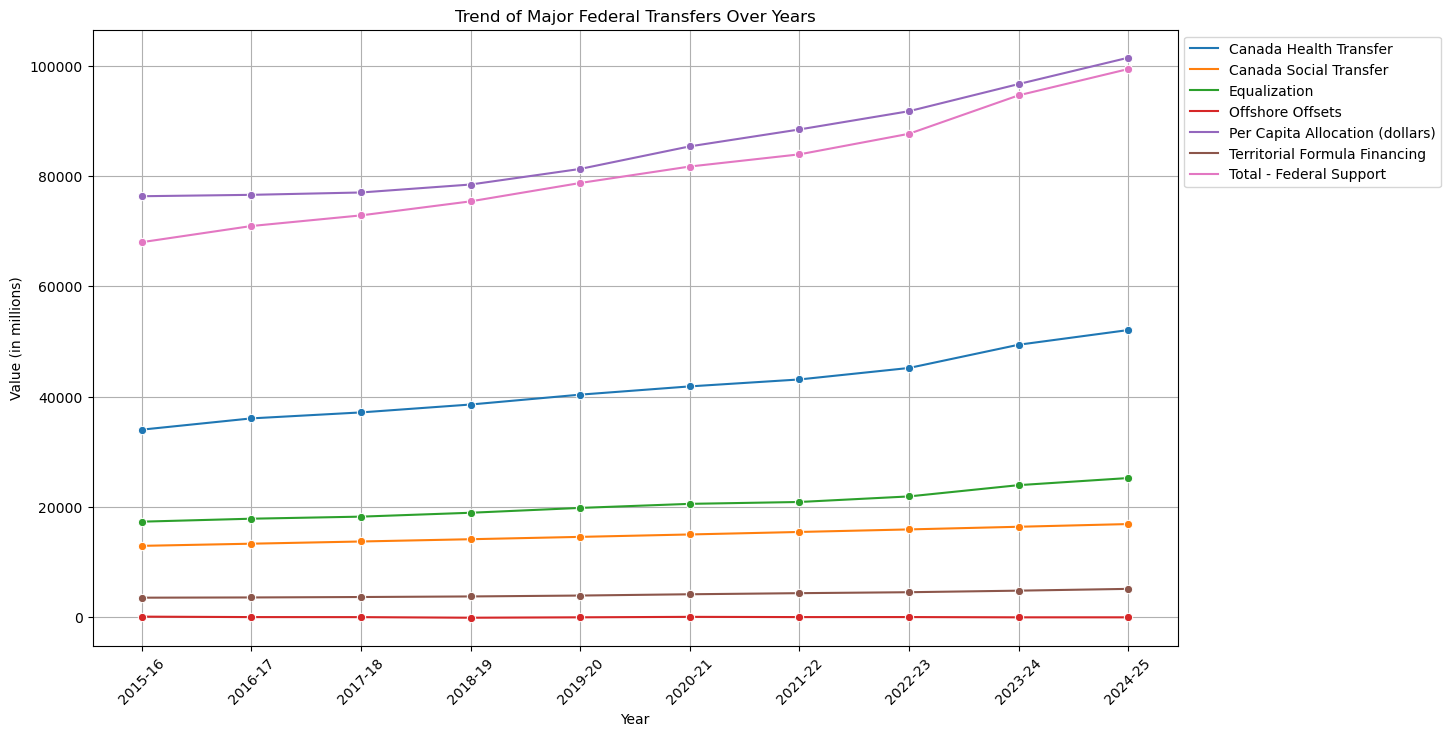

In [21]:
# Group by Category and Year and plot
category_year_df = df3.groupby(['Category', 'Year']).sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=category_year_df, x='Year', y='Value', hue='Category', marker='o')
plt.xlabel('Year')
plt.ylabel('Value (in millions)')
plt.title('Trend of Major Federal Transfers Over Years')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('Trend of Major Federal Transfers Over Years.png', bbox_inches='tight')  
plt.show()



# # Plot the trend of each category over the years
# plt.figure(figsize=(14, 8))
# sns.lineplot(data=df3, x='Year', y='Value', hue='Category', marker='o')
# plt.xlabel('Year')
# plt.ylabel('Value (in millions)')
# plt.title('Trend of Federal Support Categories Over Years')
# plt.xticks(rotation=45)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.grid(True)
# plt.show()


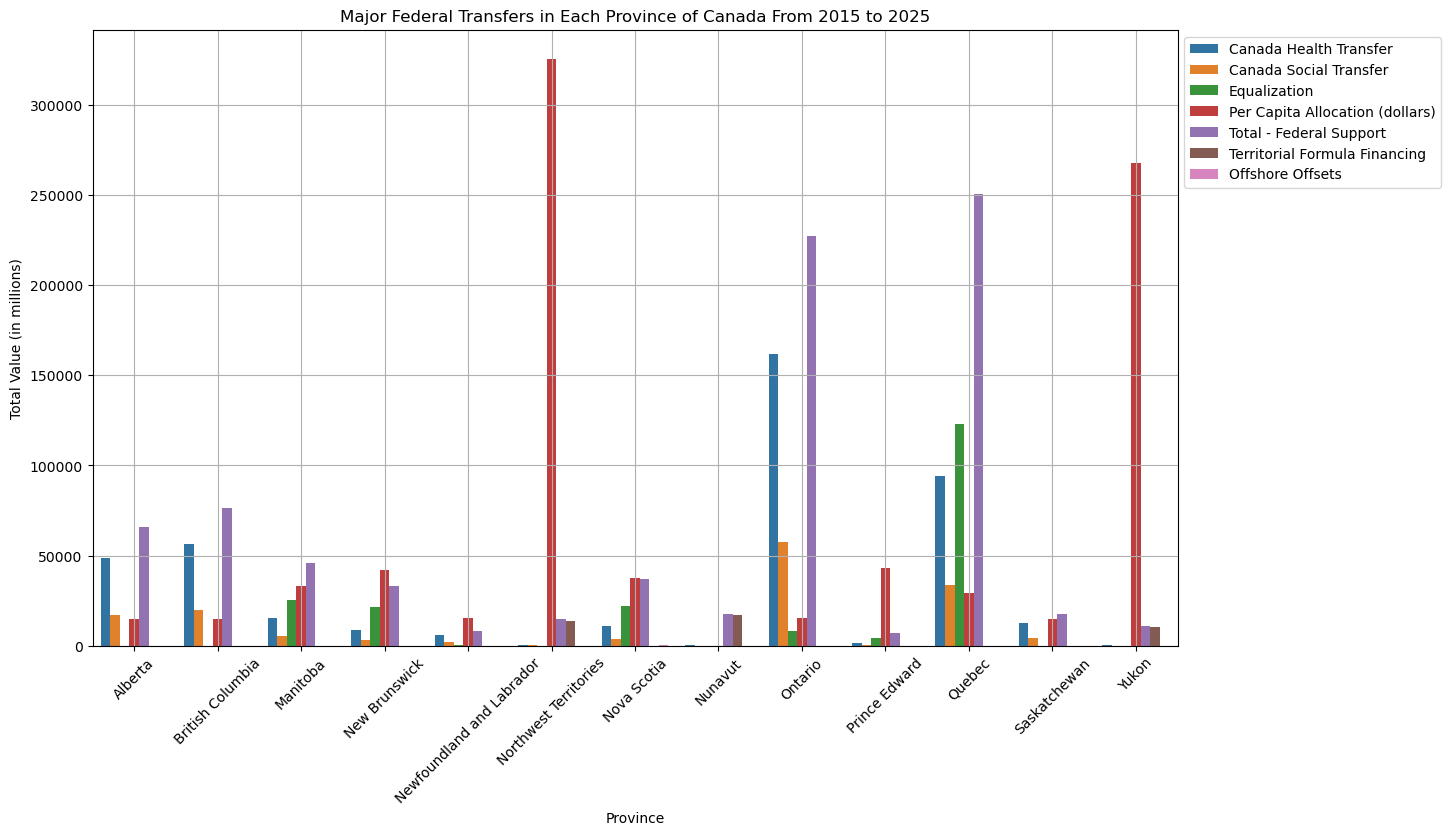

In [22]:

# Group by Province and Category
province_category_df = df3.groupby(['Province', 'Category']).sum().reset_index()

# Plot total value for each province
plt.figure(figsize=(14, 8))
sns.barplot(data=province_category_df, x='Province', y='Value', hue='Category', estimator=sum)
plt.xlabel('Province')
plt.ylabel('Total Value (in millions)')
plt.title('Major Federal Transfers in Each Province of Canada From 2015 to 2025')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('Major Federal Transfers in Each Province of Canada From 2015 to 2025.png', bbox_inches='tight')  
plt.show()
